In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import graphtools as gt
import pygsp as gsp
import matplotlib.pyplot as plt
import sys
import meld
from sklearn.cluster import KMeans

## generate gaussian mixtures 

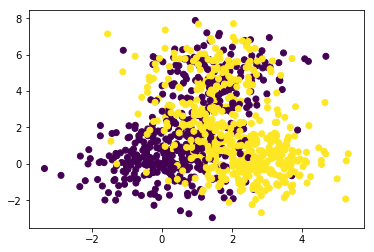

In [24]:
N = 750
mu1 = [0,0,0]
sigma1 = np.eye(3)
mu2 = [2.5,0,0]
sigma2 = np.eye(3)

mu3 = [1.5,5,0]
sigma3 = np.eye(3)

mu4 = [1,2,0]
sigma4 = np.eye(3)

d1 = np.random.multivariate_normal(mu1, sigma1, 250)
d2 = np.random.multivariate_normal(mu2,sigma2, 250)
d3 = np.random.multivariate_normal(mu3,sigma3, 250)
d4 = np.random.multivariate_normal(mu4,sigma4, 125)
mu4 = [1.5,2,0]

d5 = np.random.multivariate_normal(mu4,sigma4, 125)

d1 = d1[np.argsort(d1[:,0])]
d2 = d2[np.argsort(d2[:,0])]
d4 = d4[np.argsort(d4[:,0])]
idx = np.hstack((-1*np.ones(250), 1*np.ones(250), -1*np.ones(125), np.ones(125),-1*np.ones(125), np.ones(125)))
d_all = np.vstack((d1,d2,d3,d4,d5))
plt.scatter(d_all[:,0], d_all[:,1], c=idx)
plt.show()

## build graph, get fourier basis

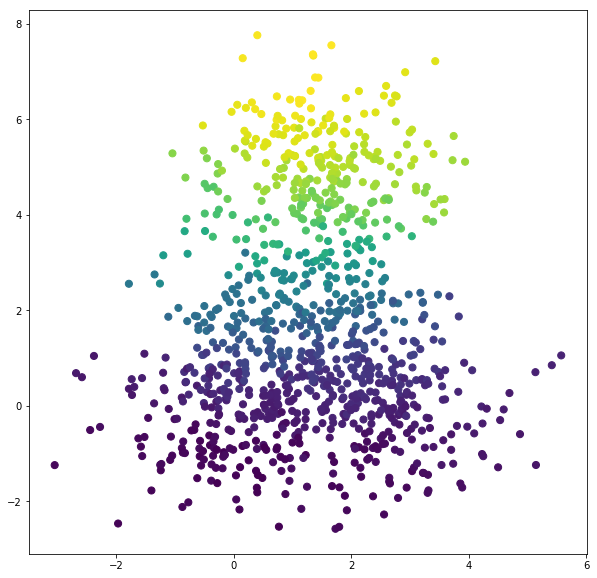

In [18]:
g = gt.Graph(d_all,decay=20, knn=5, use_pygsp = True)
g.compute_fourier_basis()
plt.figure(figsize = (10,10))

plt.scatter(d_all[:,0], d_all[:,1], c=g.U[:,1],s=50)
plt.show()

## Cluster embedding normally

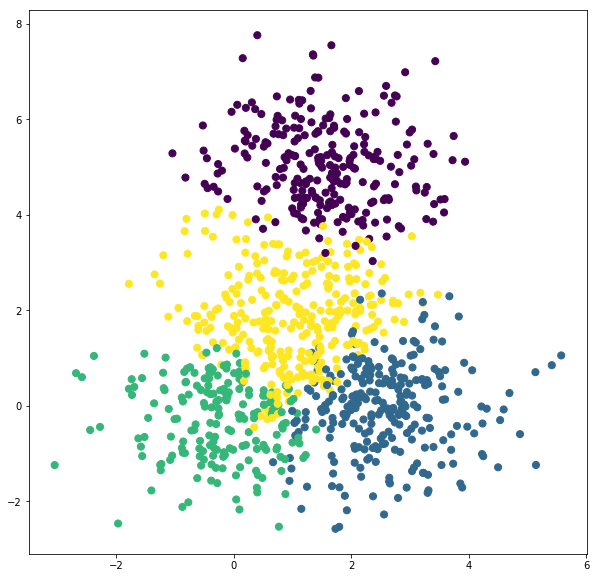

In [19]:

plt.figure(figsize = (10,10))
clabels = KMeans(n_clusters=4).fit_predict(g.U[:,0:4])
plt.scatter(d_all[:,0], d_all[:,1], c=clabels,s =50)
plt.show()

## Get a signal-biased spectral clustering, a spectrogram, and its saturation function

In [20]:
Cbase, labels,saturation_function = mc.MELDcluster(g, idx,nclusts = 4) 

AttributeError: module 'meld' has no attribute 'MELDcluster'

In [22]:
dir(mc)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'meld',
 'meldconvex',
 'spectrogram_clustering',
 'utils']

Here's what our clustering looks like with a window size of t = 40 and a saturation = 0.1

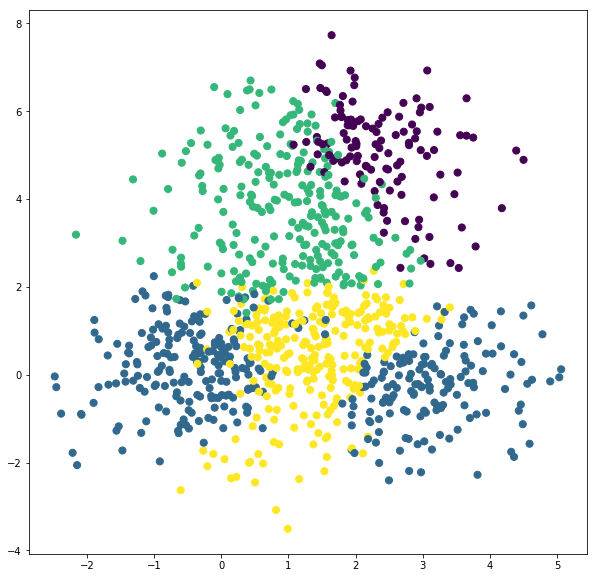

In [14]:
plt.figure(figsize = (10,10))

plt.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
plt.show()

## Let's look inside of what's going on with saturation:

Here's what the spectrogram (and clustering) looks like without any saturation

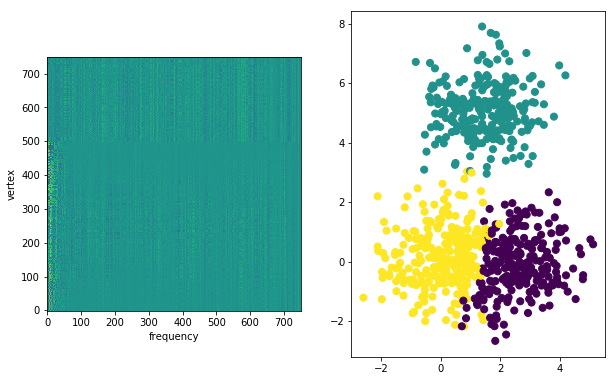

In [53]:
labels = KMeans(n_clusters=3).fit_predict(Cbase.T)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(Cbase.T, origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### Let's look at the matrix with the saturation function applied. This is what the clustering is done on.
### Saturation = 0.1

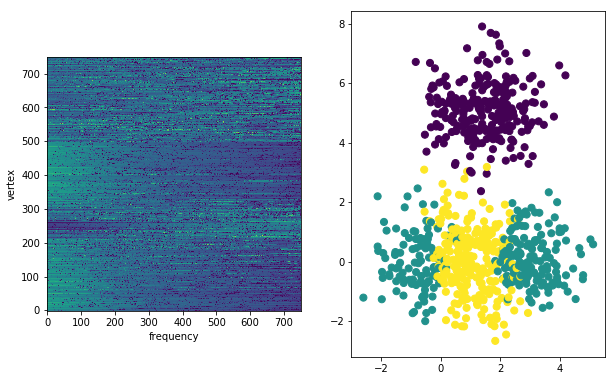

In [47]:
sat = 0.1
labels = KMeans(n_clusters=3).fit_predict(saturation_function(Cbase,sat))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,sat), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### Saturation = 0.5

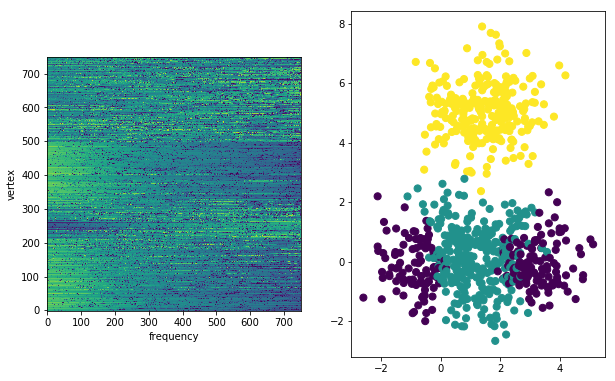

In [46]:
sat = 0.5
labels = KMeans(n_clusters=3).fit_predict(saturation_function(Cbase,sat))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,sat), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### Saturation = 0.9 (you can go much higher)

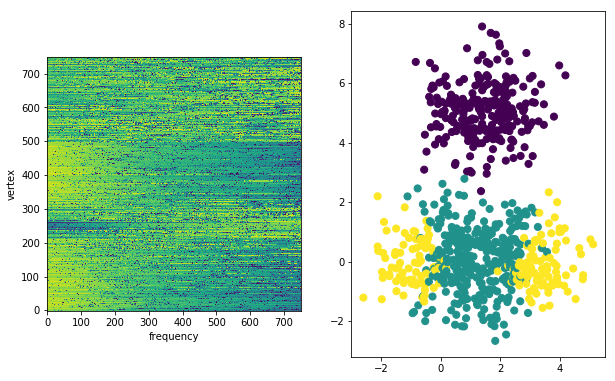

In [45]:
sat = 0.9
labels = KMeans(n_clusters=3).fit_predict(saturation_function(Cbase,sat))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,sat), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### Now let's look at the effect of t on our clustering and the underlying histogram

### t =1 

In [54]:
sat = 0.1
t = 1
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 


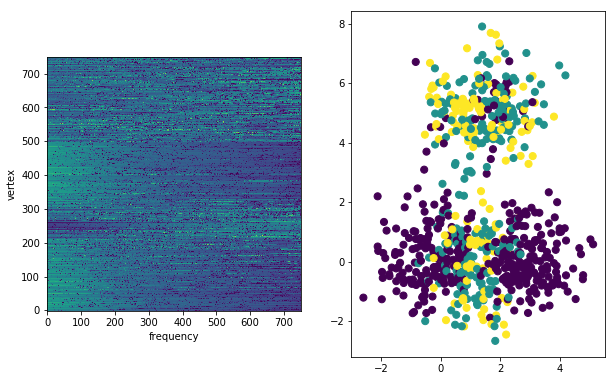

In [55]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### t = 10

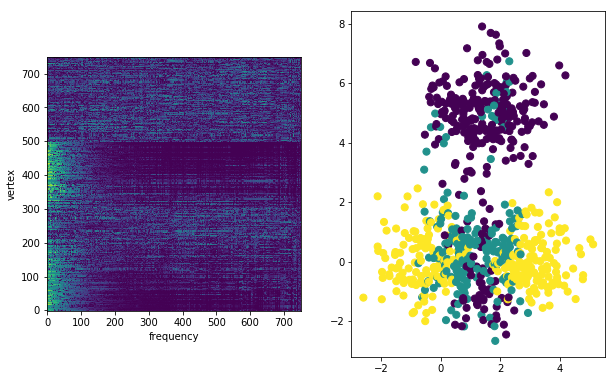

In [56]:
sat = 0.1
t = 10
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### t = 20

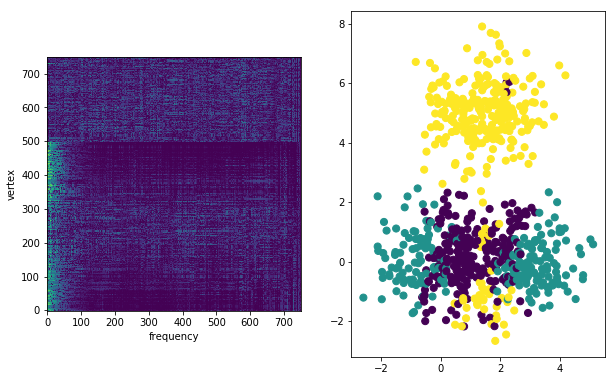

In [62]:
sat = 0.1
t = 20
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### t = 40

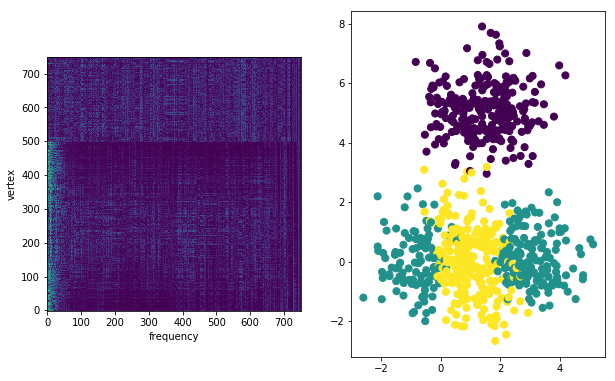

In [63]:
sat = 0.1
t = 40
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()

### t=80

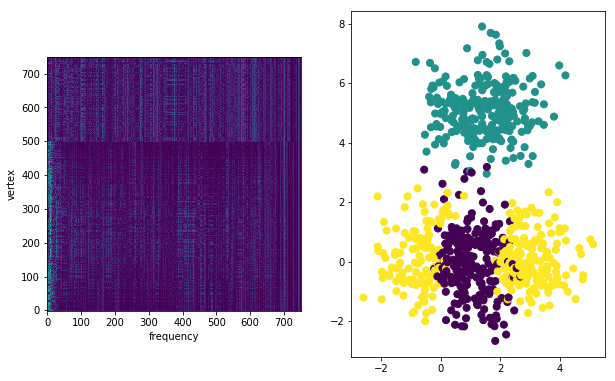

In [64]:
sat = 0.1
t = 80
C, labels, _ = mc.spectrogram_clustering(g, idx,t = t,nclusts = 3,saturation =sat) 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (10,10))
ax1.imshow(saturation_function(C,0.1), origin = 'lower')
ax1.set_xlabel('frequency')
ax1.set_ylabel('vertex')
ax2.scatter(d_all[:,0], d_all[:,1], c=labels,s =50)
ax2.set_aspect('equal')
plt.show()